# Full suite test on COSMO field, MIGHTEE data release, pyBDSF source counts around 9-10k.

   
####################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
####################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/SKAMid_B1_8h_v3_cropped.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (3490, 3198)
NOTICE: Image Size with reduced padding (3490, 3198)
NOTICE: Image opened and cut into 49 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 49/49 [01:13<00:00,  1.50s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


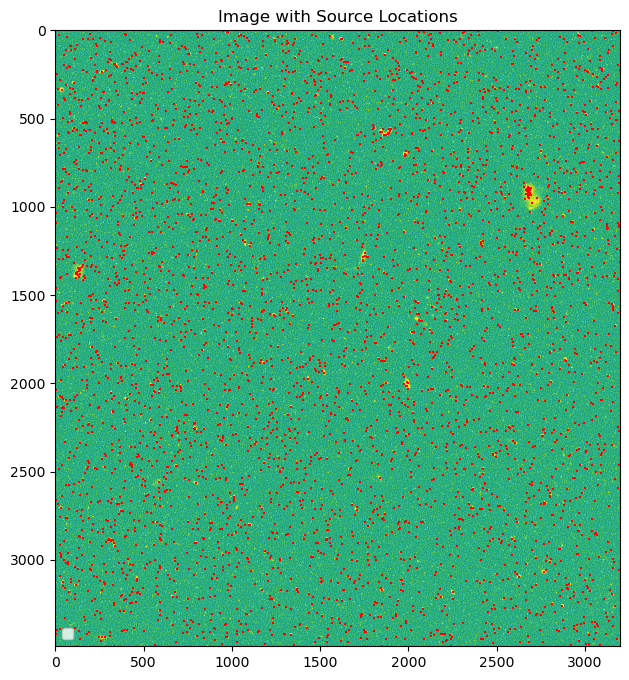

TRSF finished.
Time taken: 75.03214693069458 seconds
-------------------


In [1]:
from TRSF import trsf
img_PATH = '/Users/rs17612/Documents/Radio_Data/MIGHTEE/MIGHTEE_Continuum_Early_Science_COSMOS_r0p0.app.restored.circ.fits'
SKA_PATH = '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/SKAMid_B1_8h_v3_cropped.fits'
data = trsf(SKA_PATH,cutup_img_size=500,sigma=5)

In [ ]:
cat = data.catalogue
# set any nan values to 0
cat = cat.fillna(0)
print(cat.columns)

In [ ]:
cat

In [ ]:
# save as .fits table
from astropy.io import fits
from astropy.table import Table

cat['index'] = cat['index'].astype(int)
cat['amp'] = cat['amp'].astype(float)
cat['x'] = cat['x'].astype(float)
cat['y'] = cat['y'].astype(float)
cat['sigma_x'] = cat['sigma_x'].astype(float)
cat['sigma_y'] = cat['sigma_y'].astype(float)
cat['theta'] = cat['theta'].astype(float)
cat['peak_flux'] = cat['peak_flux'].astype(float)
cat['x_c'] = cat['x_c'].astype(float)
cat['y_c'] = cat['y_c'].astype(float)
cat['bbox'] = cat['bbox'].astype(str)
cat['Class'] = cat['Class'].astype(int)
cat['Birth'] = cat['Birth'].astype(float)
cat['Death'] = cat['Death'].astype(float)
cat['x1'] = cat['x1'].astype(int)
cat['y1'] = cat['y1'].astype(int)
cat['lifetime'] = cat['lifetime'].astype(float)
cat['x2'] = cat['x2'].astype(int)
cat['y2'] = cat['y2'].astype(int)
cat['polygon'] = cat['polygon'].astype(str)
cat['encloses_i'] = cat['encloses_i'].astype(str)
# Save the table to a FITS file
table = Table.from_pandas(cat)
table.write('data.fits', format='fits', overwrite=True)

In [ ]:
cat

In [ ]:
# open txt file to dataframe
import pandas as pd
Path = '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/TrainingSet_B1_v2.txt'
names=['ID','RA (core)','DEC (core)','RA (centroid)','DEC (centroid)','FLUX','Core frac','BMAJ','BMIN','PA','SIZE','CLASS','SELECTION','x','y']
da = pd.read_csv(Path, sep='\s+', header=None)
# remove the first row as it is a header
da = da.iloc[1:]
# remove the last 5 columns as they are not needed
da.columns = names
da

In [ ]:
from astropy.io import fits
from astropy.nddata import Cutout2D

def crop_and_save_fits(input_file, output_file, center_x, center_y, width, height):
    # Open the input FITS file
    fits_image = fits.open(input_file)
    data = fits_image[0].data[0, 0]  # Extract the 2D data array
    header = fits_image[0].header

    # Crop the image using Cutout2D
    center = (center_x, center_y)
    size = (width, height)
    cutout = Cutout2D(data, center, size)

    # Create a new FITS HDU with the cropped data and original header
    hdu = fits.PrimaryHDU(cutout.data, header=header)

    # Create a new HDU list and save it to the output file
    hdul = fits.HDUList([hdu])
    hdul.writeto(output_file, overwrite=True)

    print("Cropped FITS image saved to", output_file)

crop_and_save_fits(SKA_PATH,'/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/SKAMid_B1_8h_v3_cropped.fits',(x_min+x_max)/2,(y_min+y_max)/2,x_max-x_min,y_max-y_min)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = data.full_img
img[img==0] = np.nan
print(img.shape)

#cat = data.catalogue
print(len(cat))
plt.figure(figsize=(30,30))
plt.imshow(img,cmap='gray',vmax=np.nanpercentile(img,95),vmin=np.nanpercentile(img,0.1))
label_p = False
label = False
for i in range(0,len(cat)):
    row = cat.iloc[i]
    bbox = row.bbox
    if bbox != None:
        xmin = bbox[0] 
        xmax = bbox[2] 
        ymin = bbox[1] 
        ymax = bbox[3]
        if label == False:
            plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red',label='class 5')
            label = True
        plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red')
    else:
        polygon = row.polygon
        if label_p == False:
            plt.plot(polygon[:,1],polygon[:,0],color='green',label='class 2')
            label_p = True
        else:
            plt.plot(polygon[:,1],polygon[:,0],color='green')   
#plt.xlim(2280,3667)
#plt.ylim(3600,4600)
plt.legend()
plt.show()

In [ ]:
cat

In [ ]:
# open fits table and put data in dataframe
from astropy.table import Table
import pandas as pd

# open the fits table
t = Table.read('/Users/rs17612/Documents/Radio_Data/MIGHTEE/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits', format='fits')
# convert to pandas dataframe/
df = t.to_pandas()
df

In [ ]:
from astropy.coordinates import SkyCoord
from regions import Regions, EllipseSkyRegion, PixCoord 
from astropy.wcs import WCS

def create_sky_region(self):
    source_Coords = SkyCoord(ra=self.RA,dec=self.DEC,frame='icrs')
    SkyRegion = EllipseSkyRegion(center=self.source_Coords,width=self.MAJ*2,height=self.MIN*2,angle=self.ANGLE)
    source_region = SkyRegion

In [ ]:
from astropy.io import fits
from astropy import units as u
header = fits.open(img_PATH)[0].header
wcs = WCS(header)

def calculate_source_xy(row, wcs):
    source_coords = SkyCoord(ra=row['RA']*u.degree,dec=row['DEC']*u.degree,frame='icrs')
    source_pix = source_coords.to_pixel(wcs)
    x = source_pix[0] - 374
    y = source_pix[1] - 374
    return x,y

df[['x','y']] = df.apply(lambda row: calculate_source_xy(row, wcs), axis=1, result_type='expand')

In [ ]:
df

In [ ]:
plt.figure(figsize=(30,30))
plt.imshow(img,vmax=0.00005)
plt.scatter(df['x'],df['y'],color='black',marker='+',label='pyBDSF')
for i in range(0,len(cat)):
    row = cat.iloc[i]
    bbox = row.bbox
    if bbox != None:
        xmin = bbox[0] 
        xmax = bbox[2] 
        ymin = bbox[1] 
        ymax = bbox[3] 
        plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red')
    else:
        polygon = row.polygon
        plt.plot(polygon[:,1],polygon[:,0],color='green')
plt.xlim(2280,3667)
plt.ylim(3600,4600)
plt.legend()
plt.show()

In [ ]:
# set Class nan to 2
cat['Class'] = cat['Class'].fillna(2)
cat2 = cat[cat['Class'] == 2]
cat2

In [ ]:
# create blamk df
def func(x):
    return x*2
import pandas as pd
df2 = pd.DataFrame(data={1:1,2:2,3:3},index=[0])
df2 = df2.apply(lambda x: func(x))
df2

In [ ]:
# plot image and poylygons
plt.figure(figsize=(15,15))
plt.imshow(img,vmax=0.00005)
plt.scatter(df['x'],df['y'],color='black',marker='+',label='pyBDSF')
for i in range(0,len(cat)):
    row = cat.iloc[i]
    bbox = row.bbox
    if bbox != None:
        xmin = bbox[0] 
        xmax = bbox[2] 
        ymin = bbox[1] 
        ymax = bbox[3]
        if i == 0:
            plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red',label='TRSF') 
        else:
            plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red')
plt.legend()
plt.show()